<a href="https://colab.research.google.com/github/Nitya131003/Bitcoin/blob/main/Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files.upload()


Saving kaggl.json to kaggl.json


{'kaggl.json': b'{"username":"jainnitya","key":"9fe55e23ae444eca700ec30e84708f65"}'}

In [4]:
!pip install kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [5]:
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /content. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [6]:
!kaggle datasets download -d mczielinski/bitcoin-historical-data

Dataset URL: https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data
License(s): CC-BY-SA-4.0
 98% 88.0M/89.8M [00:03<00:00, 25.2MB/s]
100% 89.8M/89.8M [00:03<00:00, 30.1MB/s]


In [7]:
!unzip bitcoin-historical-data.zip

Archive:  bitcoin-historical-data.zip
  inflating: btcusd_1-min_data.csv   


In [8]:
!ls

bitcoin-historical-data.zip  btcusd_1-min_data.csv  kaggl.json	sample_data


In [9]:
import pandas as pd
df = pd.read_csv('btcusd_1-min_data.csv')
df.head()

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [10]:
df.shape

(6750281, 6)

In [11]:
df.describe

<bound method NDFrame.describe of             Timestamp       Open       High        Low      Close    Volume
0        1.325412e+09       4.58       4.58       4.58       4.58  0.000000
1        1.325412e+09       4.58       4.58       4.58       4.58  0.000000
2        1.325412e+09       4.58       4.58       4.58       4.58  0.000000
3        1.325412e+09       4.58       4.58       4.58       4.58  0.000000
4        1.325412e+09       4.58       4.58       4.58       4.58  0.000000
...               ...        ...        ...        ...        ...       ...
6750276  1.737936e+09  102628.00  102669.00  102608.00  102611.00  0.086742
6750277  1.737936e+09  102659.00  102712.00  102657.00  102712.00  0.488757
6750278  1.737936e+09  102631.00  102631.00  102573.00  102573.00  0.126719
6750279  1.737936e+09  102573.00  102604.00  102507.00  102514.00  0.474495
6750280           NaN   57854.00   57864.00   57835.00   57835.00  1.353466

[6750281 rows x 6 columns]>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750281 entries, 0 to 6750280
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 309.0 MB


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

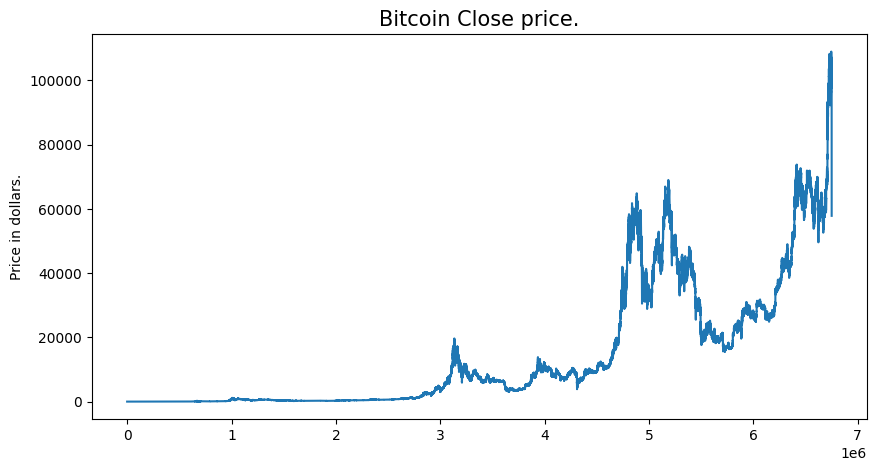

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [15]:
df.isnull().sum()

,0
Timestamp,1
Open,0
High,0
Low,0
Close,0
Volume,0


In [16]:
df = df.drop(['Volume'], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750281 entries, 0 to 6750280
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
dtypes: float64(5)
memory usage: 257.5 MB


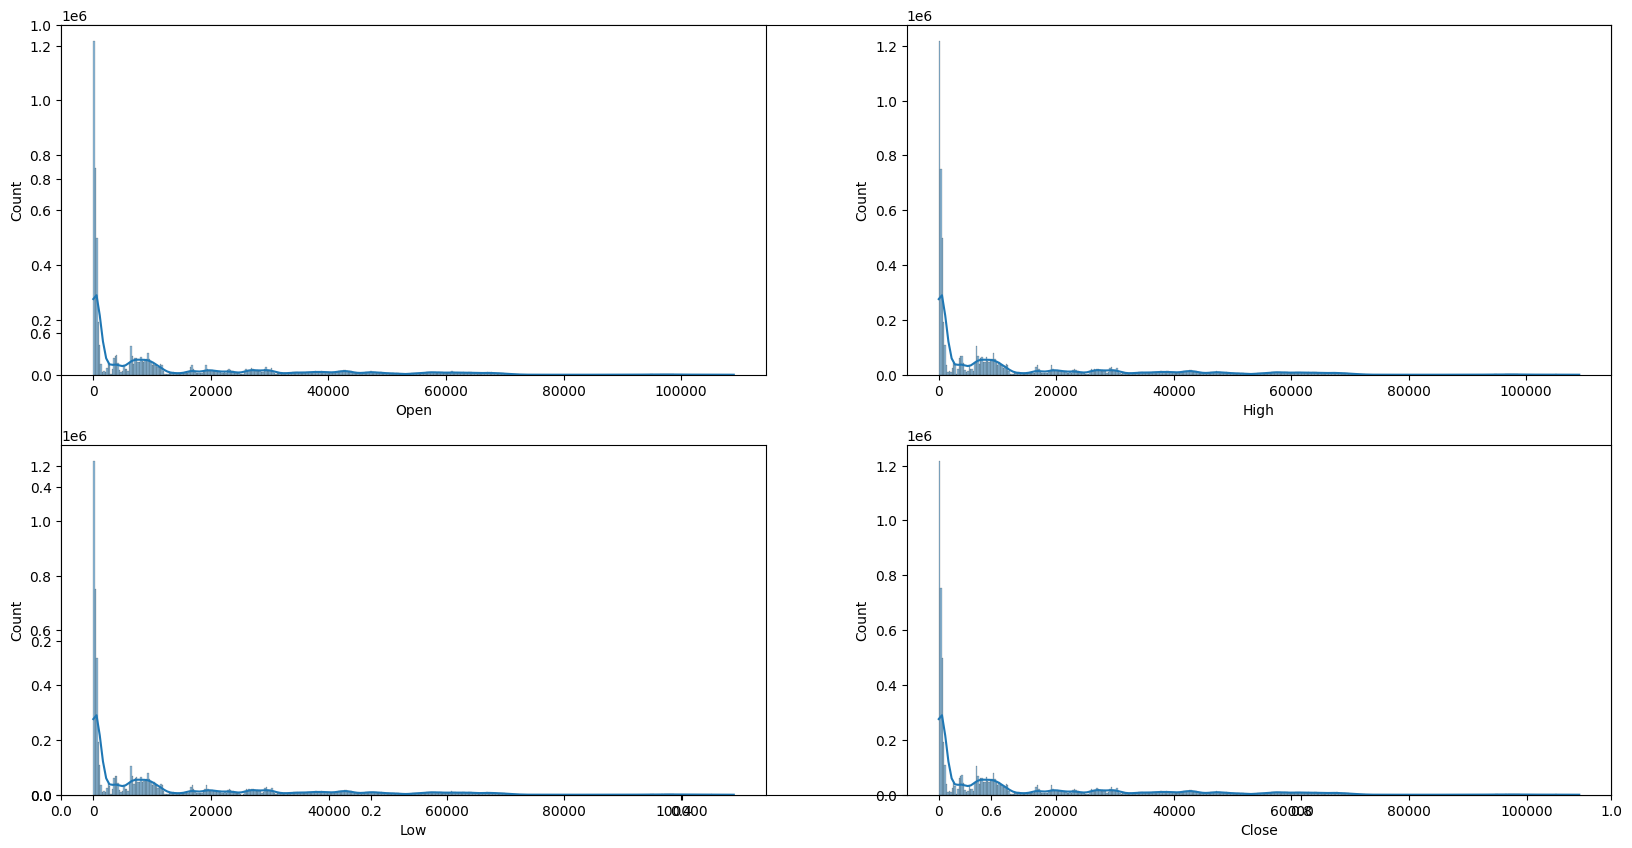

In [18]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.histplot(df[col], kde=True)
plt.show()

In [19]:
# Convert the 'Timestamp' column to datetime objects directly from Unix timestamps
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')  # 'unit' set to 's' for seconds

# Split the datetime into separate date and time columns
df['date'] = df['Timestamp'].dt.date  # Extract date part
df['time'] = df['Timestamp'].dt.time  # Extract time part

df.head()


,Timestamp,Open,High,Low,Close,date,time
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,2012-01-01,10:01:00
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,2012-01-01,10:02:00
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,2012-01-01,10:03:00
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,2012-01-01,10:04:00
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,2012-01-01,10:05:00


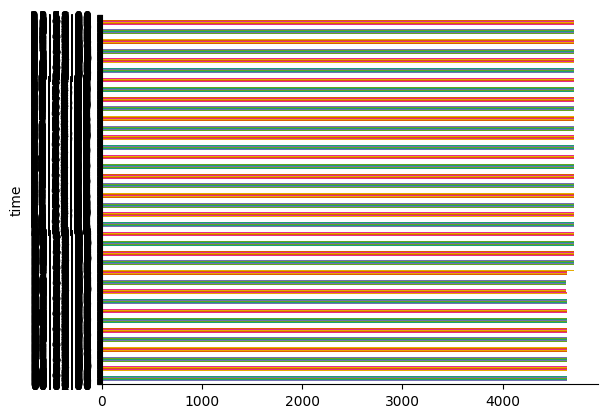

In [20]:
df.groupby('time').size().plot(kind='barh', color=sb.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

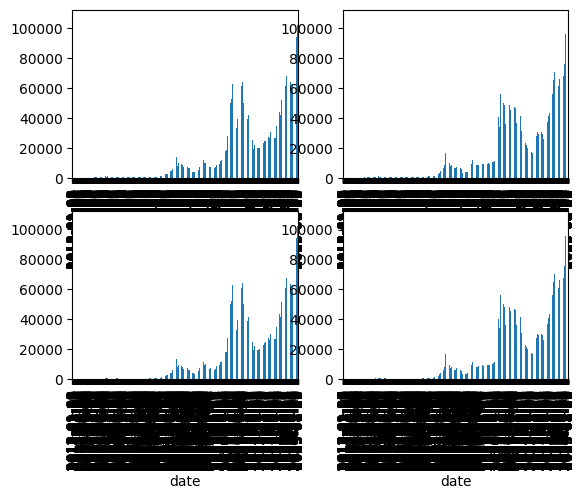

In [21]:
data_grouped = df.groupby('date')[['Open', 'High', 'Low', 'Close']].mean()

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [22]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

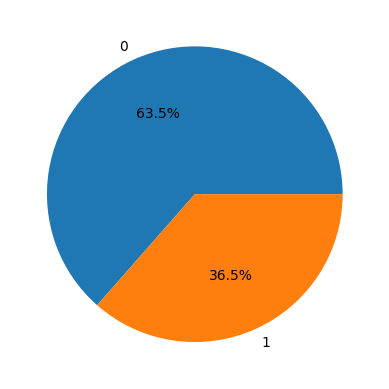

In [23]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750281 entries, 0 to 6750280
Data columns (total 10 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Timestamp   datetime64[ns]
 1   Open        float64       
 2   High        float64       
 3   Low         float64       
 4   Close       float64       
 5   date        object        
 6   time        object        
 7   open-close  float64       
 8   low-high    float64       
 9   target      int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 515.0+ MB


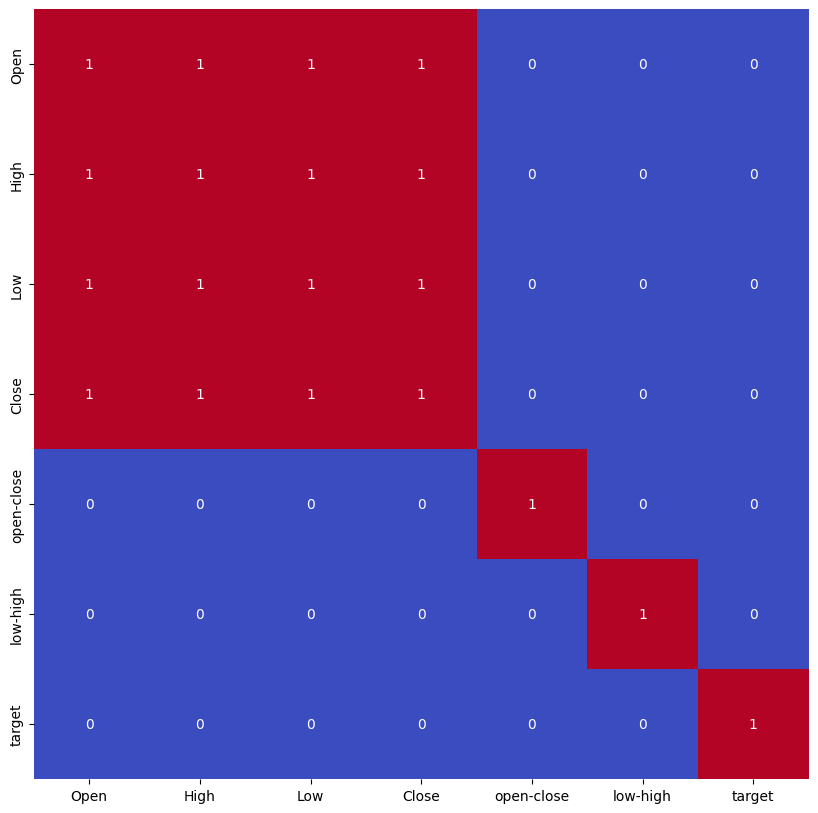

In [25]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation on numeric columns only
corr_matrix = numeric_df.corr()

# Plot the heatmap with correlations
plt.figure(figsize=(10, 10))
sb.heatmap(corr_matrix > 0.9, annot=True, cbar=False, cmap="coolwarm")
plt.show()

In [26]:
features = df[['open-close', 'low-high']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(6075252, 2) (675029, 2)


In [27]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

X_train = np.array(X_train)
Y_train = np.array(Y_train)

# Define models with optimized parameters
models = [
    LogisticRegression(),
   # SVC(kernel='rbf', probability=True),  # Changed kernel to 'rbf' for faster performance
    RandomForestClassifier(n_estimators=50, n_jobs=-1)
]

# Select 20% of data randomly for SVC to reduce training time
subset_indices = np.random.choice(len(X_train), size=int(0.2 * len(X_train)), replace=False)
X_train_small, Y_train_small = X_train[subset_indices], Y_train[subset_indices]

# Train and evaluate each model
for model in models:
    if isinstance(model, SVC):  # Use the smaller subset for SVC
        model.fit(X_train_small, Y_train_small)
    else:
        model.fit(X_train, Y_train)

    # Print model details and AUC-ROC scores
    print(f'{model} :')
    print('Training Accuracy:', metrics.roc_auc_score(Y_train, model.predict_proba(X_train)[:, 1]))
    print('Validation Accuracy:', metrics.roc_auc_score(Y_valid, model.predict_proba(X_valid)[:, 1]))
    print()


LogisticRegression() :
Training Accuracy: 0.651910060762797
Validation Accuracy: 0.6515945925833304

RandomForestClassifier(n_estimators=50, n_jobs=-1) :
Training Accuracy: 0.8067123784547369
Validation Accuracy: 0.6245874493026442



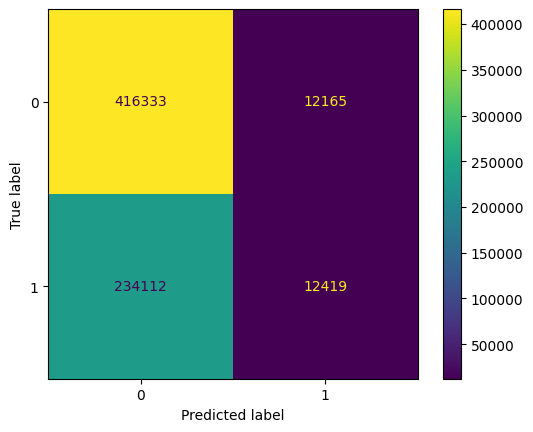

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()